In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
total = titanic.isnull().sum().sort_values(ascending=False)

total

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

The Embarked feature has only 2 missing values, which can easily be filled. 

‘Age’ feature has 177 missing values. 

The ‘Cabin’ feature might want to drop it from the dataset, since 70 % of it are missing.

In [23]:
titanic.isnull().count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       891
dtype: int64

In [105]:
percent_1 = total/titanic.isnull().count()*100

percent_1

Age            19.865320
Cabin          77.104377
Embarked        0.224467
Fare            0.000000
Name            0.000000
Parch           0.000000
PassengerId     0.000000
Pclass          0.000000
Sex             0.000000
SibSp           0.000000
Survived        0.000000
Ticket          0.000000
dtype: float64

In [25]:
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

percent_2

Cabin          77.1
Age            19.9
Embarked        0.2
Ticket          0.0
Survived        0.0
SibSp           0.0
Sex             0.0
Pclass          0.0
PassengerId     0.0
Parch           0.0
Name            0.0
Fare            0.0
dtype: float64

In [28]:
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])

missing_data.head()

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [66]:
titanic[titanic['Sex'] == 'female']['Survived']

1      1
2      1
3      1
8      1
9      1
      ..
880    1
882    0
885    0
887    1
888    0
Name: Survived, Length: 314, dtype: int64

Let's check the features which affect 'Survival' feature.

Looks like 'Passengerid', 'tiket' and '  ' does not affect.

The survival feature can be categorized by Male and Female.

In [76]:
[titanic[titanic['Sex'] == 'female']['Survived'] == 1]

[1       True
 2       True
 3       True
 8       True
 9       True
        ...  
 880     True
 882    False
 885    False
 887     True
 888    False
 Name: Survived, Length: 314, dtype: bool]

In [59]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [77]:
sns.distplot?

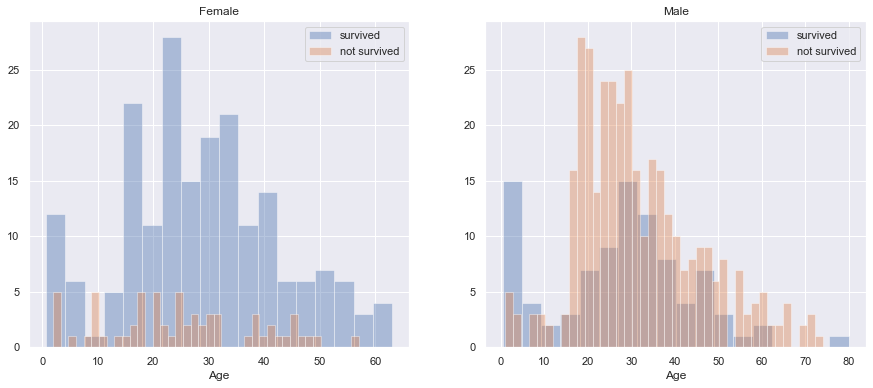

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

survived = 'survived'
not_survived = 'not survived'

fig, axes  = plt.subplots(ncols = 2, nrows = 1, figsize = (15,6))

women = titanic[titanic['Sex'] == 'female']
men = titanic[titanic['Sex'] == 'male']

ax = sns.distplot(women[women['Survived'] == 1].Age.dropna(), label = survived, ax = axes[0], kde = False, bins = 18)
ax = sns.distplot(women[women['Survived'] == 0].Age.dropna(), label = not_survived, ax = axes[0], kde = False, bins = 40)

ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived'] == 1].Age.dropna(), label = survived, ax = axes[1], kde = False, bins = 18)
ax = sns.distplot(men[men['Survived'] == 0].Age.dropna(), label = not_survived, ax = axes[1], kde = False, bins = 40)

ax.legend()
_ = ax.set_title('Male')

You can see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.

For men the probability of survival is very low between the age of 5 and 18, but that isn’t true for women. Another thing to note is that infants also have a little bit higher probability of survival.

Since there seem to be certain ages, which have increased odds of survival and because I want every feature to be roughly on the same scale, I will create age groups later on.

In [124]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Fare, Age and Passenger id have bigger mean and data is wide spread (Std is vast)

The rest are not mentioned as they are object datatype.

In [125]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


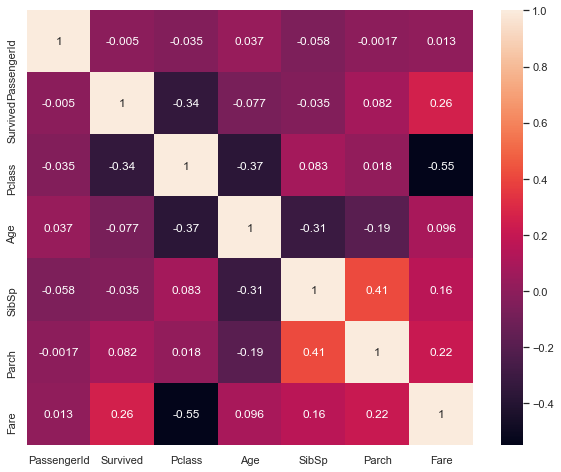

In [128]:
plt.figure(figsize = (10,8))
sns.heatmap(titanic.corr(), annot = True)

'Age', 'Pclass' seems to be negatively correlated.

It's relation can be seen with the help of FacetGrid.

In [119]:
sns.FacetGrid?

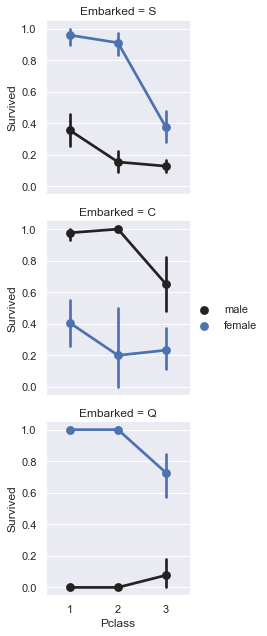

In [118]:
FacetGrid = sns.FacetGrid(titanic, row = 'Embarked')
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = None, order = None, hue_order = None)
FacetGrid.add_legend()

Embarked seems to be correlated with survival, depending on the gender.

Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C. Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.

Pclass also seems to be correlated with survival. We will generate another plot of it below.

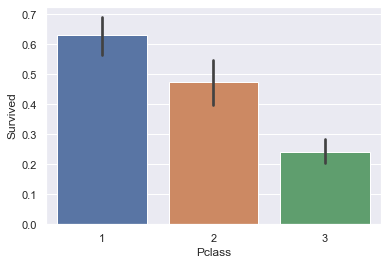

In [123]:
#Pclass also influences the survived column as it is seen below.

sns.barplot(x = 'Pclass', y = 'Survived', data = titanic)

It is evident, as class 1 has more survivers than class 3.

More detailed view can be drawn with the help of FacetGrid.

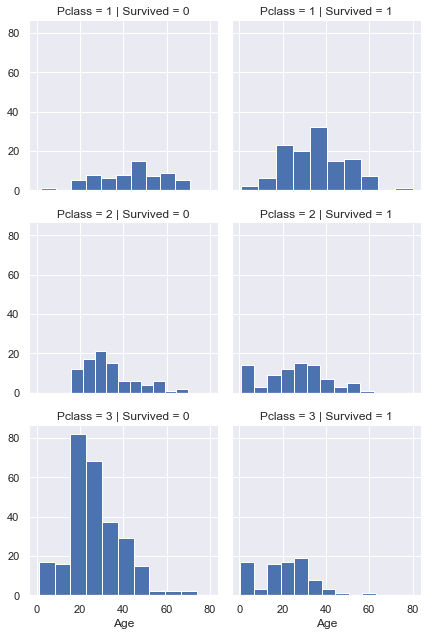

In [122]:
count = sns.FacetGrid(titanic, row = 'Pclass', col = 'Survived')
count.map(plt.hist, 'Age')
count.add_legend()

The plot above confirms our assumption about pclass 1, but we can also spot a high probability that a person in pclass 3 will not survive.

In [139]:
titanic1 = titanic.drop(['PassengerId'], axis = 1)

In [140]:
titanic1 = titanic1.drop(['Cabin'], axis = 1)

In [141]:
titanic1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [142]:
np.random.randint?

In [152]:
np.isnan(titanic1["Age"])

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [153]:
mean = titanic1['Age'].mean()

std = titanic1['Age'].std()

is_null = titanic1['Age'].isnull().sum()

# compute random numbers between the mean, std and is_null

rand_age = np.random.randint(mean - std, mean + std, size = is_null)

# fill NaN values in Age column with random values generated

age_slice = titanic1["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
titanic1["Age"] = age_slice

titanic1["Age"] = titanic["Age"].astype(int)

titanic1["Age"].isnull().sum()

0

In [154]:
titanic1['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [156]:
common_value = 'S'

titanic1['Embarked'] = titanic1['Embarked'].fillna(common_value)

In [157]:
titanic1['Embarked'].isnull().sum()

0

In [158]:
titanic1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int32  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    int64  
dtypes: float64(1), int32(1), int64(5), object(3)
memory usage: 66.3+ KB


In [166]:
data = [titanic1]
for dataset in data:

    dataset['Age'] = dataset['Age'].astype(int)

#Let's group the data in a way that the final datatype of 'Age' becomes int64

    dataset.loc[dataset['Age'] <= 11, 'Age'] = 0

    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <=20), 'Age'] = 1

    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 30), 'Age'] = 2

    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age'] = 3

    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'Age'] = 4

    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 60), 'Age'] = 5

    dataset.loc[(dataset['Age'] > 60) & (dataset['Age'] <= 66), 'Age'] = 6

    dataset.loc[dataset['Age'] > 66, 'Age'] = 6


titanic1['Age'].value_counts()

0    891
Name: Age, dtype: int64

In [164]:
titanic1.loc[ titanic1['Age'] <= 11, 'Age'] = 0
titanic1.loc[(titanic1['Age'] > 11) & (titanic1['Age'] <= 18), 'Age'] = 1
titanic1.loc[(titanic1['Age'] > 18) & (titanic1['Age'] <= 22), 'Age'] = 2
titanic1.loc[(titanic1['Age'] > 22) & (titanic1['Age'] <= 27), 'Age'] = 3
titanic1.loc[(titanic1['Age'] > 27) & (titanic1['Age'] <= 33), 'Age'] = 4
titanic1.loc[(titanic1['Age'] > 33) & (titanic1['Age'] <= 40), 'Age'] = 5
titanic1.loc[(titanic1['Age'] > 40) & (titanic1['Age'] <= 66), 'Age'] = 6
titanic1.loc[ titanic1['Age'] > 66, 'Age'] = 6

titanic1['Age'].value_counts()

0    891
Name: Age, dtype: int64